 # Fake News Classification


### About Dataset
Dataset Summary

The Fake News Classification Dataset is an English-language dataset containing just over 45,000 unique news articles. These articles are classified as true (1) or false (0), making it a valuable resource for researchers and practitioners in the field of fake news identification using Transformers models. This is the first version of the dataset aimed at studying fake news detection.

Supported Tasks and Leaderboards

### This dataset supports the following tasks:

Text classification
Fact-checking
Intent classification
Languages

The dataset is primarily in English as generally spoken in the United States (en-US).

https://www.kaggle.com/datasets/aadyasingh55/fake-news-classification?select=train+%282%29.csv

 ## 1. Data upload and first study

In [3]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import notebook

In [4]:
nltk.download("stopwords")
nltk.download("punkt_tab")
nltk.download("words")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package words to /Users/macbook/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [5]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Fake_News_Classification/archive/train (2).csv', sep=';')
df_test = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Fake_News_Classification/archive/test (1).csv', sep=';')
df_eval = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Fake_News_Classification/archive/evaluation.csv', sep=';')

In [6]:
# First study train data
display(df.info())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24353 non-null  int64 
 1   title       24353 non-null  object
 2   text        24353 non-null  object
 3   label       24353 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 761.2+ KB


None

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0
5,5,Suspected Boko Haram suicide bombers kill at l...,"BAUCHI, Nigeria (Reuters) - Suspected Boko Har...",1
6,6,WATCH: John Oliver Presents GOP Debates As ‘Cl...,John Oliver isn t known for mincing words when...,0
7,7,Senate Democrats ask Trump attorney general pi...,WASHINGTON (Reuters) - Nine Democratic senator...,1
8,8,Trump HUMILIATES Republicans In Latest Hissy ...,Donald Trump sure knows how to add insult to i...,0
9,9,MACY’S GETS THE BOOT FROM LOYAL CUSTOMERS AFTE...,I know Patty and I are boycotting Macy s for d...,0


In [7]:
# First study test data
display(df_test.info())
display(df_test.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8117 entries, 0 to 8116
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8117 non-null   int64 
 1   title       8117 non-null   object
 2   text        8117 non-null   object
 3   label       8117 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 253.8+ KB


None

,Unnamed: 0,title,text,label
0,0,"Live from New York, it's a Trump-Clinton remat...",NEW YORK (Reuters) - Veteran actor and frequen...,1
1,1,Catalan separatists to lose majority in tight ...,BARCELONA (Reuters) - Catalonia s independence...,1
2,2,North Carolina governor concedes election to D...,"WINSTON-SALEM, N.C. (Reuters) - North Carolina...",1
3,3,Draft Senate Iran legislation sets tough new U...,WASHINGTON (Reuters) - Draft legislation respo...,1
4,4,California governor taps U.S. Representative B...,"SACRAMENTO, Calif. (Reuters) - California Gove...",1
5,5,"Trump makes overture to Ryan, while Republican...","WASHINGTON (Reuters) - Donald Trump, leading t...",1
6,6,PAUL RYAN Won’t Fund Border Fence For US Citiz...,Ryan has never made any secret about his desir...,0
7,7,U.S. intel chief declines comment on any Trump...,WASHINGTON (Reuters) - U.S. Director of Nation...,1
8,8,Soon-to-go-free jail convicts snared in French...,PARIS (Reuters) - Two French prison inmates wh...,1
9,9,Fed turns to Trump agenda with rate hike nearl...,WASHINGTON (Reuters) - The Federal Reserve ina...,1


In [8]:
# First study eval data
display(df_eval.info())
display(df_eval.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8117 entries, 0 to 8116
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8117 non-null   int64 
 1   title       8117 non-null   object
 2   text        8117 non-null   object
 3   label       8117 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 253.8+ KB


None

,Unnamed: 0,title,text,label
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0
5,5,AL Cops Kill Suicidal Woman After Her Parents...,"On April 3, 2016, Melissa Boarts frantic moth...",0
6,6,U.S. judge to mull release of Trump video test...,SAN DIEGO (Reuters) - U.S. District Judge Gonz...,1
7,7,Chinese State Media Calls Trump Out After He ...,Donald Trump has been poking China with a prov...,0
8,8,"Texas Moving To Ban Jews, Muslims, and Gays f...",Texas parents looking to adopt may soon be ban...,0
9,9,House Dem Drops SHOCKING Bombshell On Nationa...,Democratic Rep. Maxine Waters (D-CA) got super...,0


In [9]:
questions = df

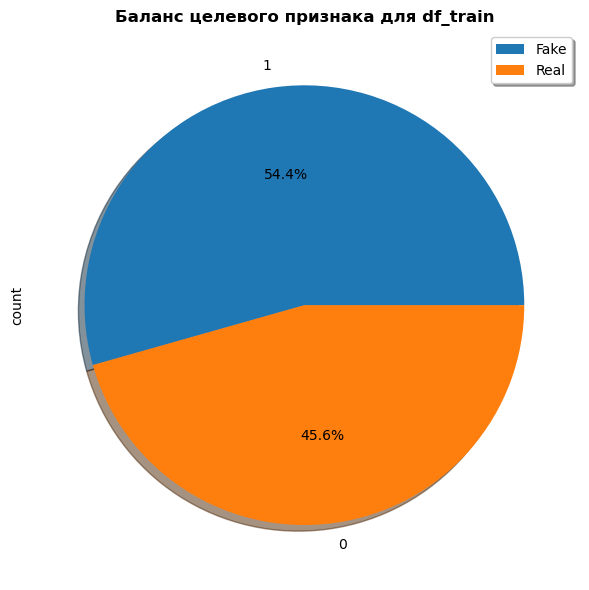

In [10]:
# Build circle diagram for target
# Создание фигуры
plt.figure(figsize=(8, 6))  # Установка размера фигуры
plt.title('Баланс целевого признака для df_train', fontweight="bold")  # Заголовок для диаграммы

# Построение круговой диаграммы
questions.label.value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%')  # Построение круговой диаграммы

# Добавление легенды
plt.legend(['Fake', 'Real'], shadow=True)  # Легенда для круговой диаграммы

# Отображение диаграммы
plt.tight_layout()  # Регулировка позиций элементов
plt.show()  # Показать диаграмму

 ### 1.1 Clear data

In [12]:
# Используем несколько функций для очистки тестовых данных и сохраним на диске для дальнейшего использования
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "") # удаляем все ссылки
    df[text_field] = df[text_field].str.replace(r"http", "") # удаляем все ссылки
    df[text_field] = df[text_field].str.replace(r"@\S+", "") # удаление упоминания пользователей
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ") # заменяем все цифры и знаки
    df[text_field] = df[text_field].str.replace(r"@", "at") # Замена символа "@" на "at"
    df[text_field] = df[text_field].str.lower() # приводим к нижнему регистру
    return df

questions = standardize_text(questions, "text")

df_test = standardize_text(df_test, "text")
df_eval = standardize_text(df_eval, "text")

questions.to_csv("/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Fake_News_Classification/archive/clean_data_train.csv")
questions.head()

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"ramallah, west bank (reuters) - palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,beijing (reuters) - u.s. president-elect donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,while the controversy over trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,beijing (reuters) - a trip to beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,there has never been a more uncourageous perso...,0


In [13]:
# Загрузим очищенные данные
clean_questions = pd.read_csv("/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Fake_News_Classification/archive/clean_data_train.csv")
clean_questions.tail()

,Unnamed: 0.1,Unnamed: 0,title,text,label
24348,24348,24348,Mexico Senate committee OK's air transport dea...,mexico city (reuters) - a key committee in mex...,1
24349,24349,24349,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...,if she s not toast now then we re in bigger tr...,0
24350,24350,24350,trump breaks from stump speech to admire beaut...,kremlin nato was created for agression \nruss...,0
24351,24351,24351,NFL PLAYER Delivers Courageous Message: Stop B...,dallas cowboys star wide receiver dez bryant t...,0
24352,24352,24352,NORDSTROM STOCK TAKES NOSEDIVE After Trump Twe...,update: nordstrom stock closed up slightly tod...,0


 #### 1.2 Data preparation - tokenization

In [15]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+') # Создание экземпляра класса токенизации с параметром r'\w+' чтобы считывались  буквы, цифры и символ подчеркивания

clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize) # Разбиваем колонку "text" на токены и создаем новую колонкку
clean_questions.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label,tokens
0,0,0,Palestinians switch off Christmas lights in Be...,"ramallah, west bank (reuters) - palestinians s...",1,"[ramallah, west, bank, reuters, palestinians, ..."
1,1,1,China says Trump call with Taiwan president wo...,beijing (reuters) - u.s. president-elect donal...,1,"[beijing, reuters, u, s, president, elect, don..."
2,2,2,FAIL! The Trump Organization’s Credit Score W...,while the controversy over trump s personal ta...,0,"[while, the, controversy, over, trump, s, pers..."
3,3,3,Zimbabwe military chief's China trip was norma...,beijing (reuters) - a trip to beijing last wee...,1,"[beijing, reuters, a, trip, to, beijing, last,..."
4,4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,there has never been a more uncourageous perso...,0,"[there, has, never, been, a, more, uncourageou..."


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in clean_questions["tokens"] for word in tokens] # Получаем общее количество слов из всей колонки
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]] # Получаем список с длинной предложения
VOCAB = sorted(list(set(all_words))) # Получаем уникальные слова во всей колонки
max_len = max(sentence_lengths)
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

10253656 words total, with a vocabulary size of 108673
Max sentence length is 8139


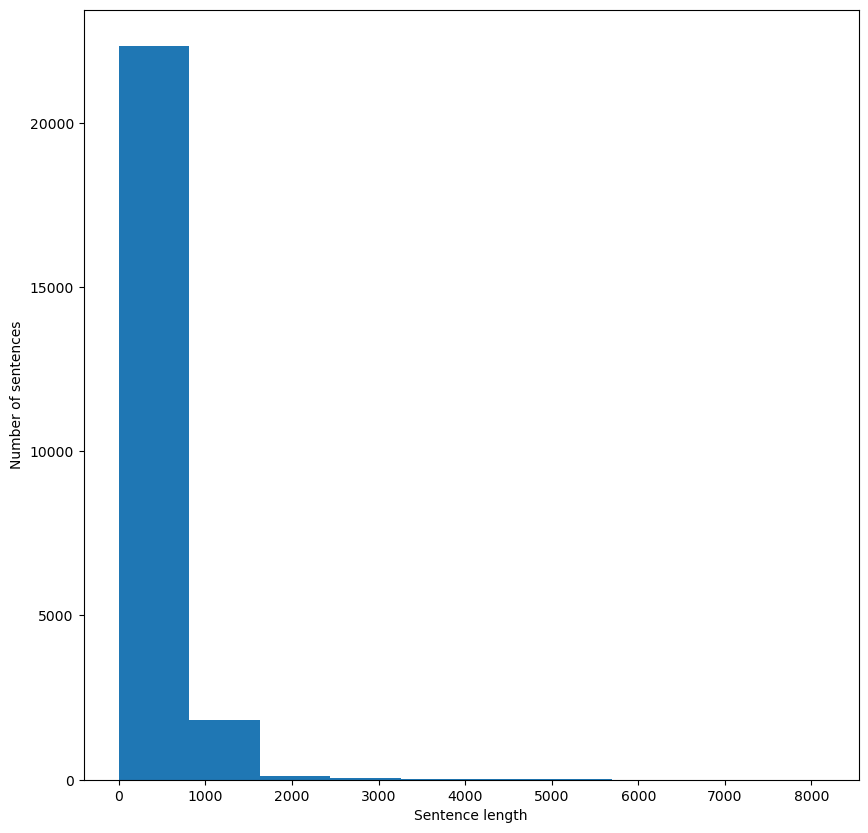

In [17]:
# Explore on histogram the length of sentences
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

 ### 2. Data preparing

 #### 2.1 Bag of words , creating an embedding

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer() # Создания экземпляра класса для векторизации текста

    emb = count_vectorizer.fit_transform(data) # Обучение экземляра и преобразование этих же данных в векторный вид

    return emb, count_vectorizer # На выходе получаем преобразованные данные и обученную модель 

list_corpus_train = clean_questions["text"].tolist()  # Преобразование колонки "text" к формату спика
list_labels_train = clean_questions["label"].tolist() # Преобразование колонки "text" к формату спика
list_corpus_test = df_test["text"].tolist()
list_labels_test = df_test["label"].tolist()
list_corpus_eval = df_eval["text"].tolist()
list_labels_eval = df_eval["label"].tolist()

X_train, X_test, y_train, y_test = list_corpus_train, list_corpus_test, list_labels_train, list_labels_test
X_eval, y_eval = list_corpus_eval, list_labels_eval

X_train_counts, count_vectorizer = cv(X_train) # Получаем векторизованныеданные и модель
X_test_counts = count_vectorizer.transform(X_test) # Получаем векторизованные данные для теста
X_eval_counts = count_vectorizer.transform(X_eval)

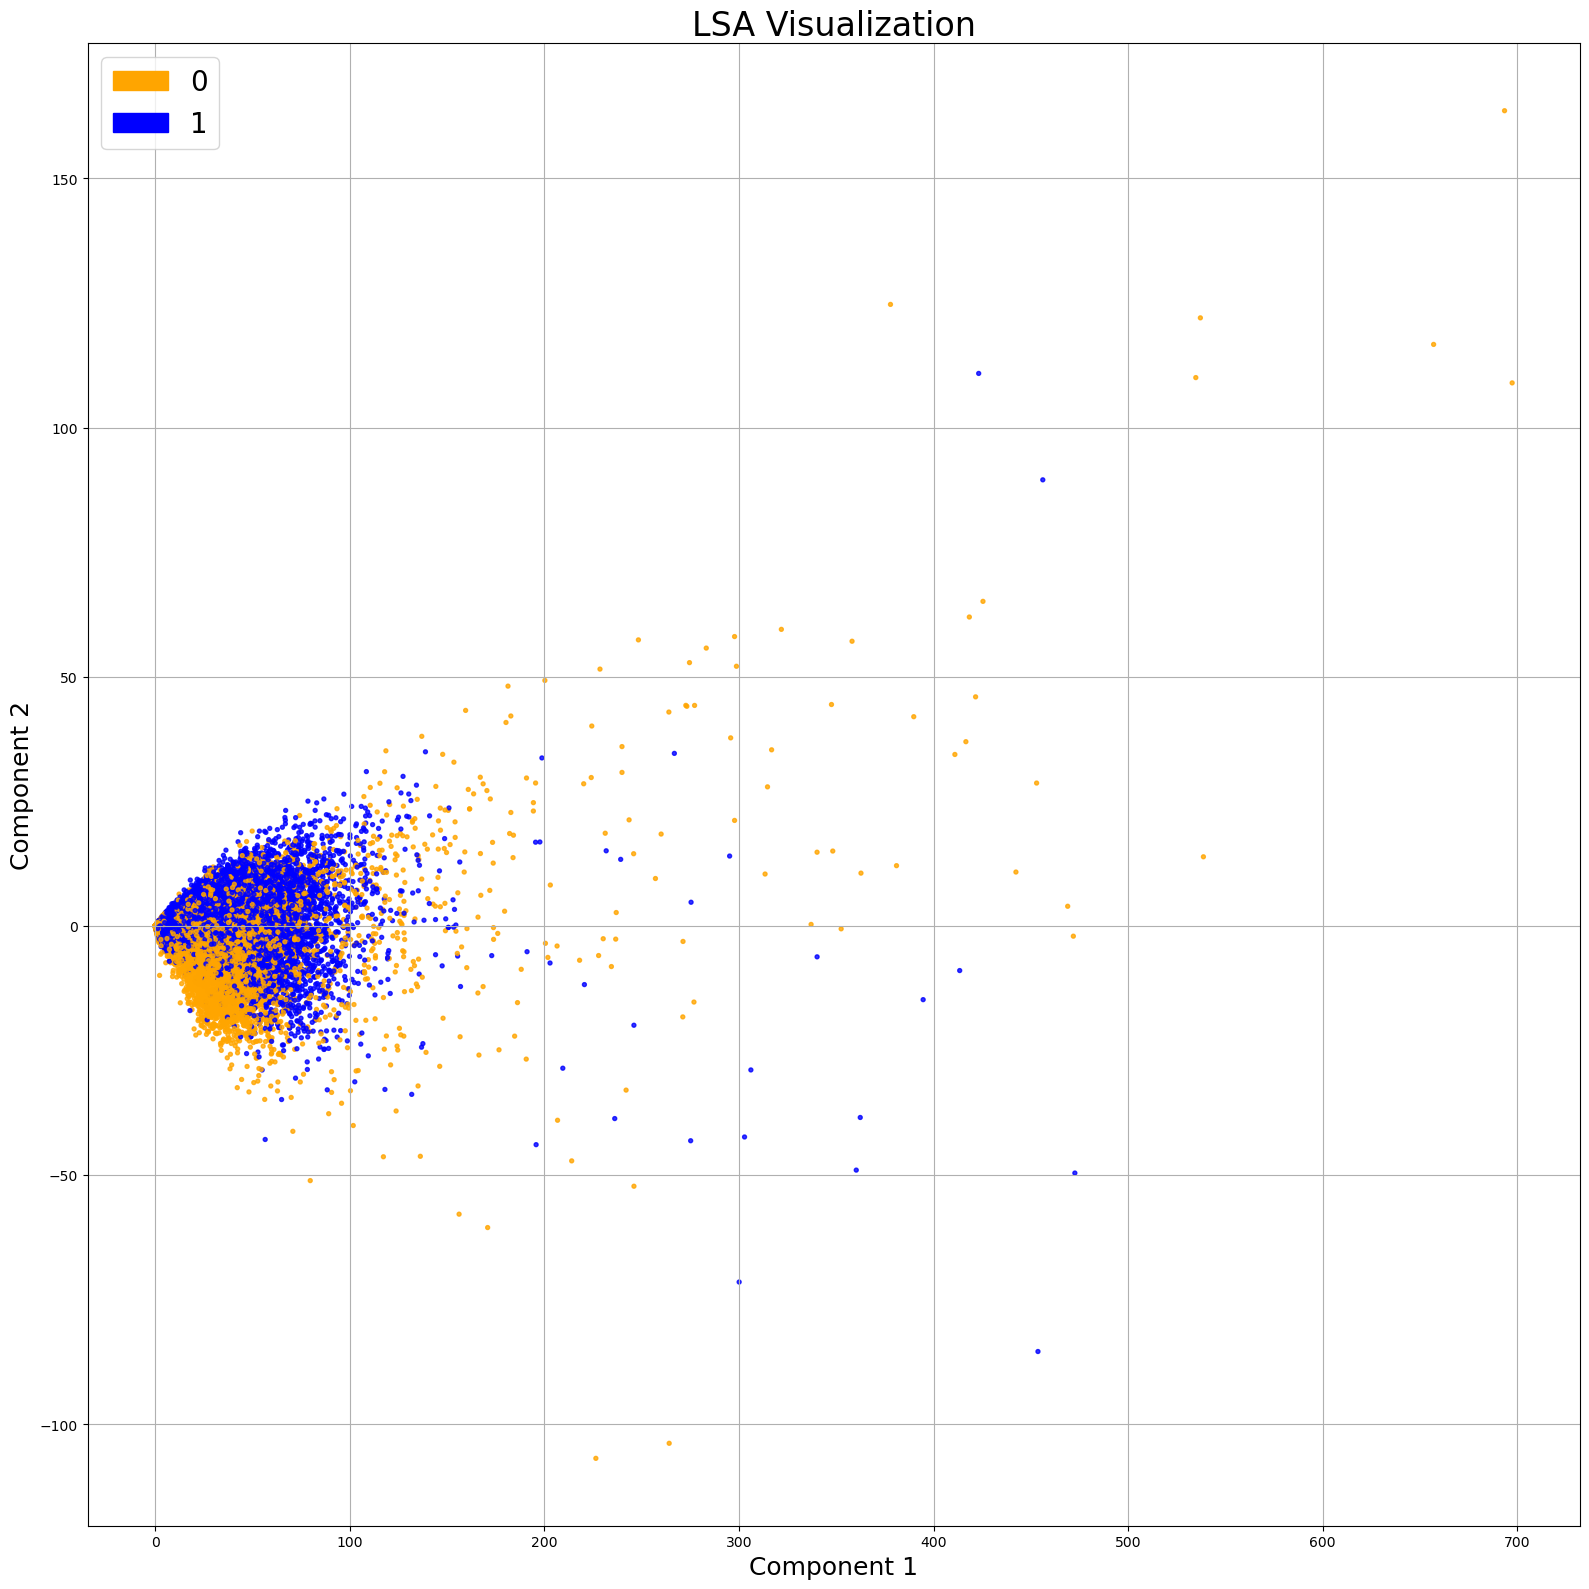

In [21]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors  # Импортируем colors

def plot_LSA(test_data, test_labels, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    
    # Создаем маппинг для меток
    color_mapper = {label: idx for idx, label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    
    # Определяем цвета для каждой метки
    colors = ['orange', 'blue']  # Цвета для двух меток
    
    if plot:
        plt.figure(figsize=(16, 16))  # Установка размера фигуры
        plt.scatter(lsa_scores[:, 0], lsa_scores[:, 1], s=8, alpha=.8, c=color_column, cmap=matplotlib.colors.ListedColormap(colors))
        
        # Создаем легенду для меток
        patches = [mpatches.Patch(color=colors[idx], label=label) for label, idx in color_mapper.items()]
        plt.legend(handles=patches, prop={'size': 20})
        
        plt.title('LSA Visualization', fontsize=24)
        plt.xlabel('Component 1', fontsize=18)
        plt.ylabel('Component 2', fontsize=18)
        plt.grid(True)
        plt.tight_layout()  # Регулировка позиций элементов

# Предполагаем, что X_train_counts и y_train уже определены
plot_LSA(X_train_counts, y_train)
plt.show()

In [22]:
# Learn simple model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight='balanced', solver='liblinear', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


In [23]:
# Получим метрики по результатам
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted)             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted)
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted)
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.980, precision = 0.983, recall = 0.981, f1 = 0.982


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Функция для построения матрицы ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

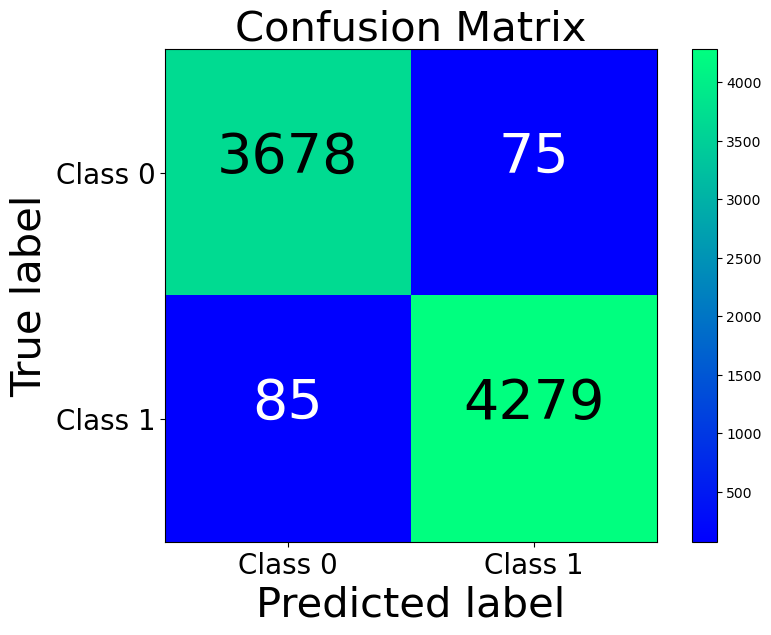

In [25]:
cm = confusion_matrix(y_test, y_predicted_counts)

# Определяем классы
class_names = ['Class 0', 'Class 1']

# Построение матрицы ошибок
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, normalize=False,
                      title='Confusion Matrix')
plt.show()

 #### Even with simple model, we received a good metrics

 ### 2.2 TF-IDF (Term Frequency, Inverse Document Frequency) 

In [28]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

<Figure size 1600x1600 with 0 Axes>

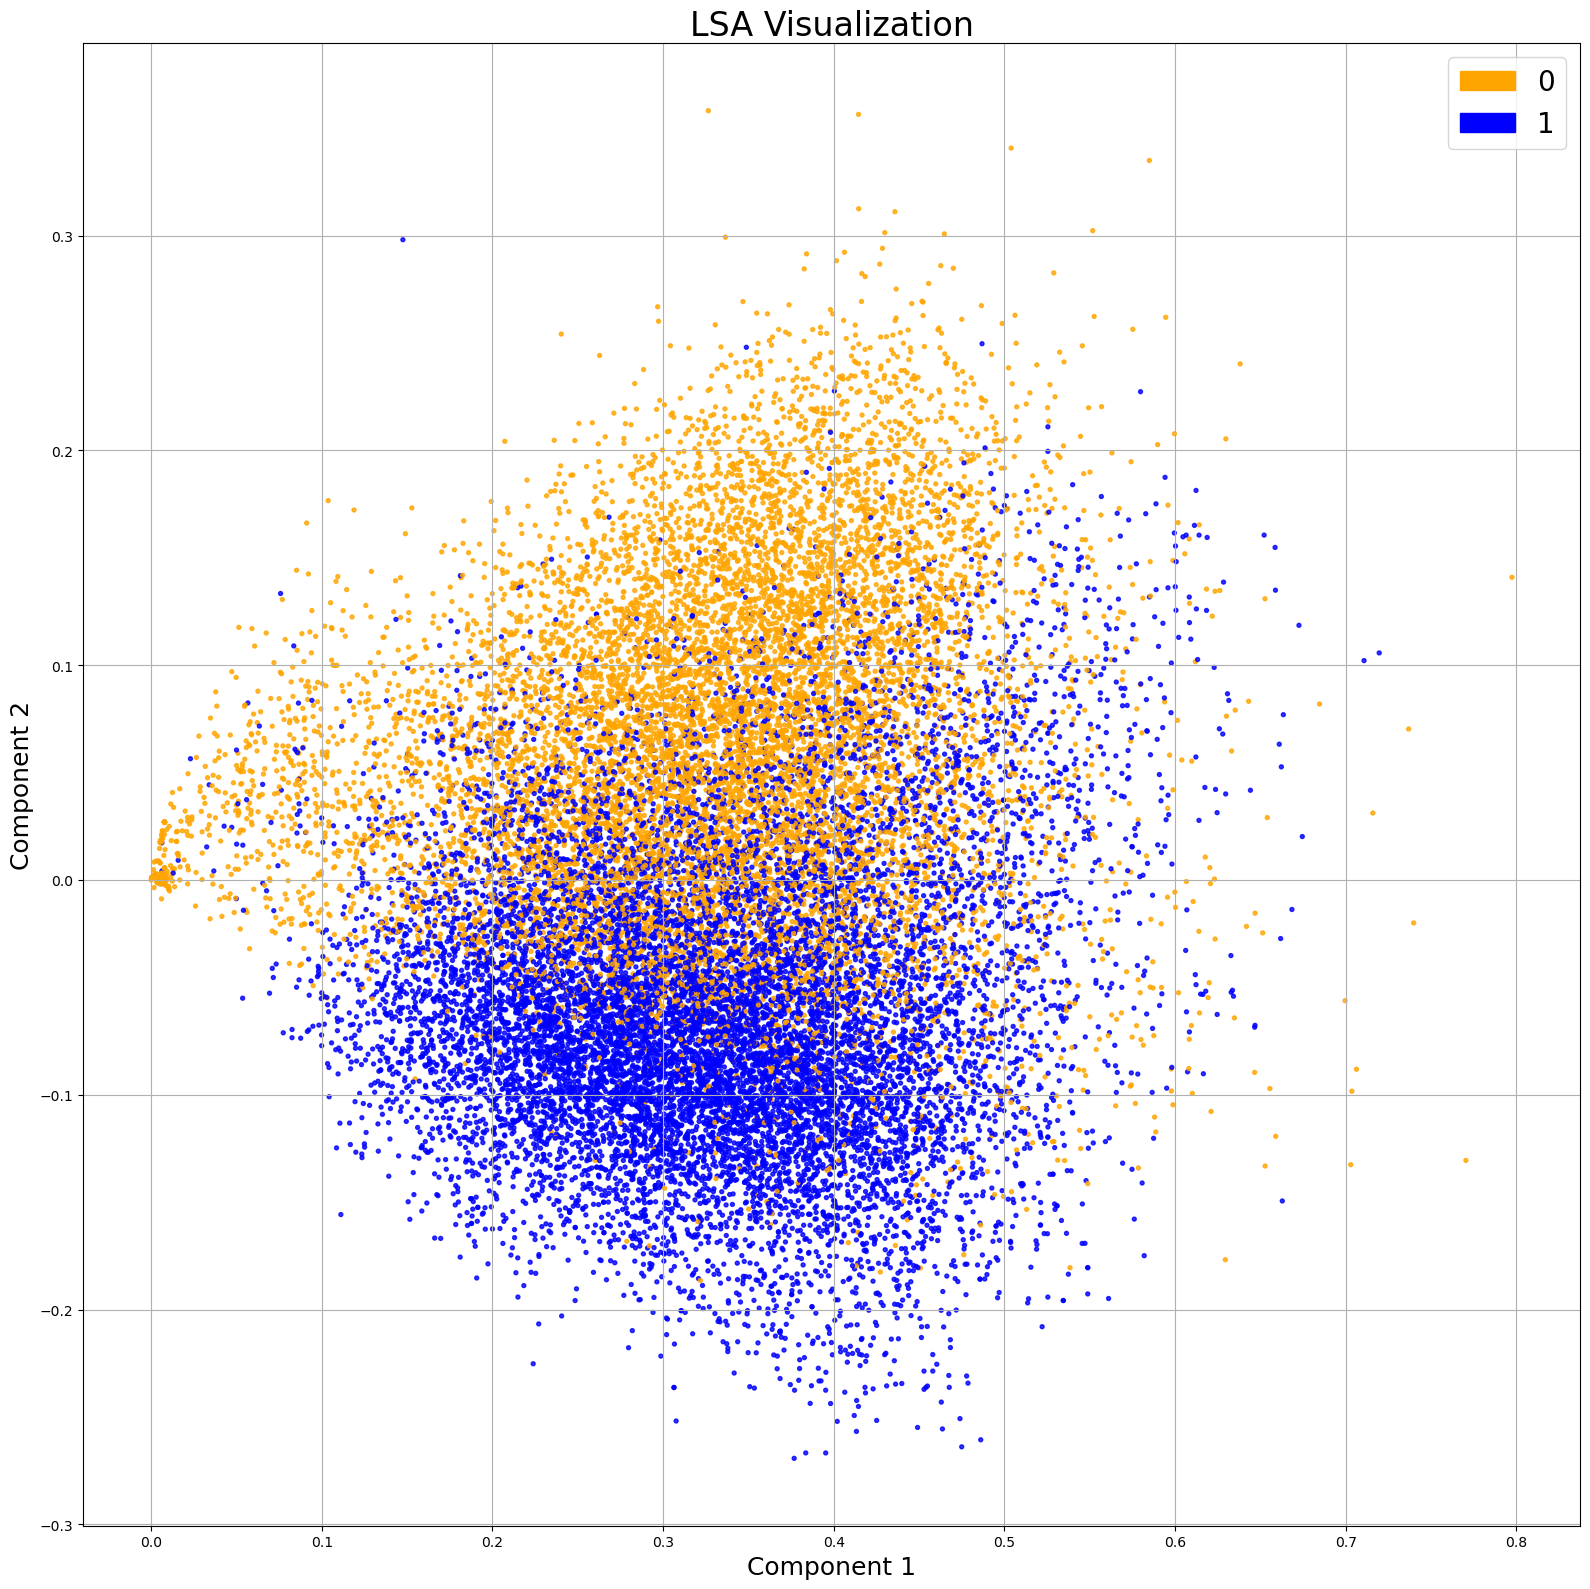

In [29]:
# Визуализация данных после скоринга
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [30]:
# Обучение модели с использованием TF-IDF
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [31]:
# Получение метрик
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.979, precision = 0.981, recall = 0.981, f1 = 0.981


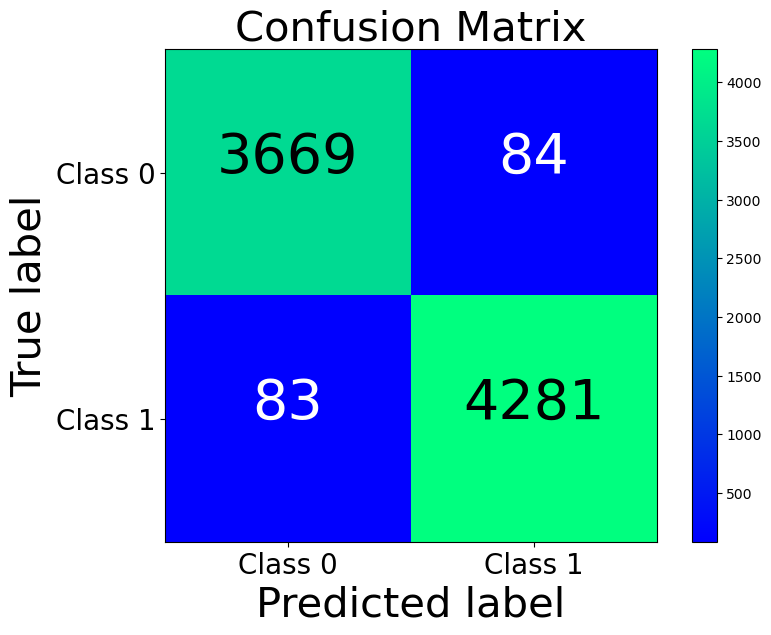

In [32]:
# Build matrix of mistake

cm = confusion_matrix(y_test, y_predicted_tfidf)

# Определяем классы
class_names = ['Class 0', 'Class 1']

# Построение матрицы ошибок
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, normalize=False,
                      title='Confusion Matrix')
plt.show()

 ### 2.3 Use Word2Vec

In [34]:
import gensim

# Load Google's pre-trained Word2Vec model.
word2vec_path = "/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/word2vec/GoogleNews-vectors-negative300.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [35]:
# Функция для получения векторных представлений на основе предъобученной модели word2vec
def get_average_word2vec(tokens_list, # список слов (токенов)
                         vector, # модель Word2Vec (векторы слов)
                         generate_missing=False, # флаг, указывающий, как обрабатывать отсутствующие слова.
                         k=300): # размерность векторов (по умолчанию 300)
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [36]:
# Получаем векторные представления полученные с помощью word2vec
embeddings = get_word2vec_embeddings(word2vec, clean_questions)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels_train, 
                                                                                        test_size=0.2, random_state=40)

<Figure size 1600x1600 with 0 Axes>

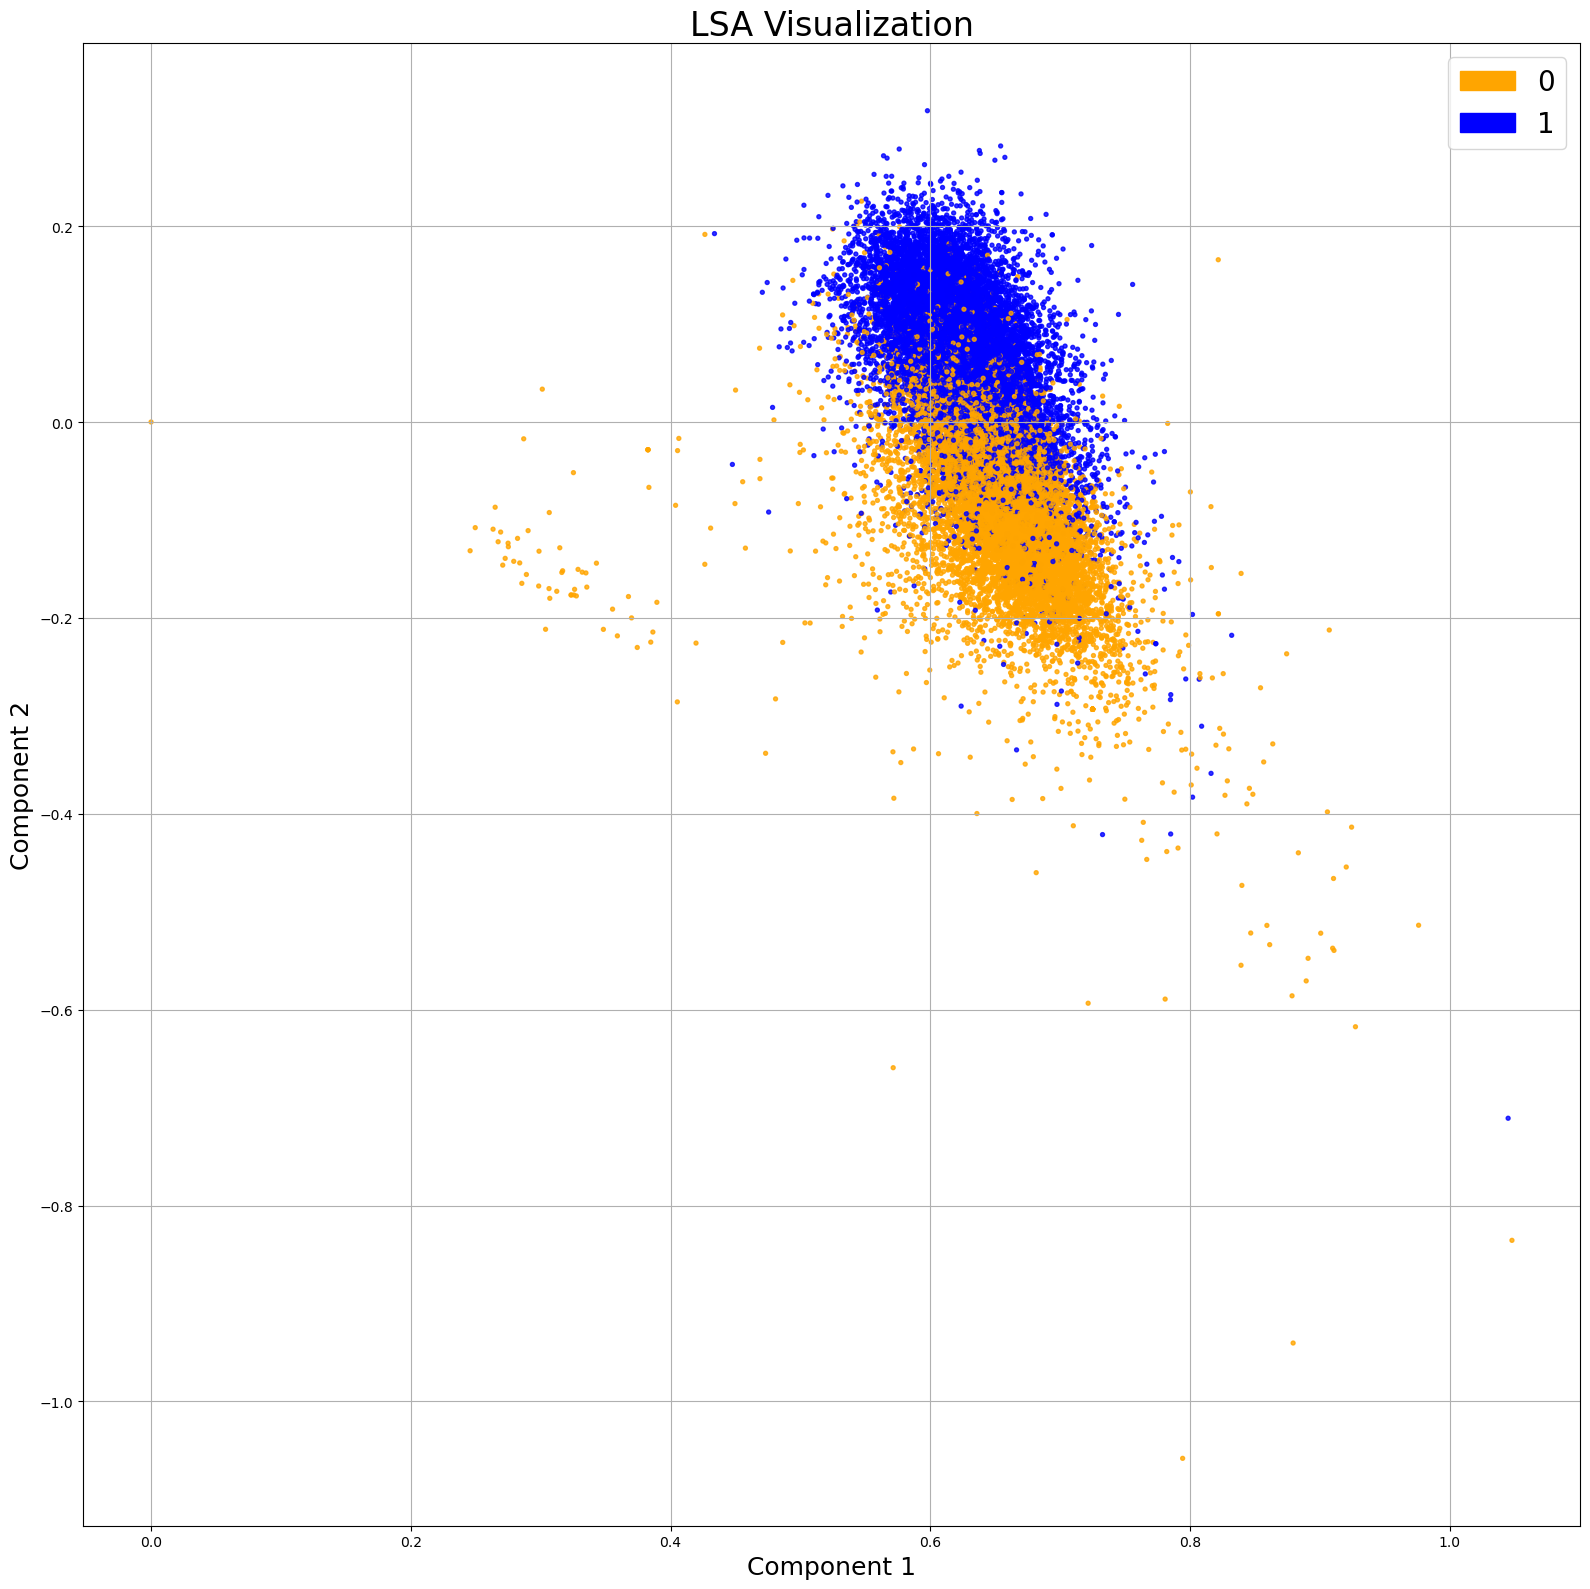

In [37]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels_train)
plt.show()

In [38]:
# Обучим логистическую регрессию
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [39]:
# Получим метрики
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.949, precision = 0.959, recall = 0.948, f1 = 0.954


In [40]:
print("With bag of words accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
print("With TF-IDF accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))
print("With word2vec accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

With bag of words accuracy = 0.980, precision = 0.983, recall = 0.981, f1 = 0.982
With TF-IDF accuracy = 0.979, precision = 0.981, recall = 0.981, f1 = 0.981
With word2vec accuracy = 0.949, precision = 0.959, recall = 0.948, f1 = 0.954


 ### Use simple model with bag of words

In [42]:
# df_train + df test
df_total = pd.concat([df, df_test], ignore_index=True)

In [43]:
df_total

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"ramallah, west bank (reuters) - palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,beijing (reuters) - u.s. president-elect donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,while the controversy over trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,beijing (reuters) - a trip to beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,there has never been a more uncourageous perso...,0
...,...,...,...,...
32465,8112,Sanders at Vatican says rich-poor gap worse th...,vatican city (reuters) - u.s. presidential can...,1
32466,8113,how trump happened,force and fanaticism wahhabism in saudi arabi...,1
32467,8114,Turkey will take two steps if Germany takes on...,"istanbul (reuters) - turkey, whose relations w...",1
32468,8115,BREAKING: DEVICE THAT BUSTED HILLARY CLINTON D...,here s why clinton and abedin should be flippi...,0


In [44]:
df_total = standardize_text(df_total, "text") # Clean column "text"
tokenizer = RegexpTokenizer(r'\w+') 
df_total["tokens"] = df_total["text"].apply(tokenizer.tokenize) # received tokens

In [45]:
list_corpus_total = df_total['text'].tolist()
list_label_total = df_total['label'].tolist()

X_total, y_total = list_corpus_total, list_label_total

X_total_count, count_vectorizer = cv(X_total)
X_eval_counts = count_vectorizer.transform(X_eval)

In [46]:
# Learn simple model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight='balanced', solver='liblinear', n_jobs=-1, random_state=40)
clf.fit(X_total_count, y_total)

y_predicted_counts = clf.predict(X_eval_counts)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


In [47]:
accuracy, precision, recall, f1 = get_metrics(y_eval, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.977, precision = 0.980, recall = 0.976, f1 = 0.978


 ### Use pretrained BERT

In [49]:
import time
import datetime
import random 
def format_time(elapsed):
    # Округляем до ближайшей секунды.
    elapsed_rounded = int(round((elapsed)))

    # Форматируем как hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [50]:
def get_device():
    # Если в системе есть GPU ...
    if torch.cuda.is_available():
        # Тогда говорим PyTorch использовать GPU.
        device = torch.device("cuda")
        print('There are %d GPU(s) available.' % torch.cuda.device_count())
        print('We will use the GPU:', torch.cuda.get_device_name(0))
    # Если нет GPU, то считаем на обычном процессоре ...
    else:
        print('No GPU available, using the CPU instead.')
        device = torch.device("cpu")
    return device


device = get_device()

No GPU available, using the CPU instead.


In [51]:
from transformers import BertTokenizer, BertForSequenceClassification
output_dir = '/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Bert_for_Fake_news_classification/'
# Загружаем натренированную модель и её словарь
model = BertForSequenceClassification.from_pretrained(output_dir)
tokenizer = BertTokenizer.from_pretrained(output_dir)

# Отправляем модель на GPU.
if torch.cuda.is_available():
    model.to(device)

In [52]:
def get_embeddings(texts):
    t0 = time.time()
    embeddings = []
    batch_size = 100  # Размер пакета для обработки

    # Обрабатываем тексты пакетами
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]  # Берем пакет текстов
        
        # Токенизация входных текстов
        inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")
        
        # Перемещаем тензоры на устройство (GPU или CPU)
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)

        with torch.no_grad():  # Отключаем градиенты для экономии памяти
            outputs = model.bert(input_ids, attention_mask=attention_mask)
        
        # Получаем эмбеддинги из последнего скрытого состояния
        hidden_states = outputs.last_hidden_state  # Размерность: (batch_size, seq_length, hidden_size)

        # Для получения эмбеддингов текста можно использовать [CLS] токен (первый токен)
        cls_embeddings = hidden_states[:, 0, :]  # Получаем эмбеддинг [CLS] токена

        # Добавляем эмбеддинги в общий список
        embeddings.append(cls_embeddings.cpu().numpy())

    training_time = format_time(time.time() - t0)
    print("  Total time : {:}".format(training_time))
    # Объединяем все эмбеддинги в один массив
    return np.concatenate(embeddings, axis=0)  # Преобразуем в numpy массив и возвращаем

In [75]:
train = clean_questions['text'].tolist()

In [77]:
features_train = get_embeddings(train)

  Total time : 0:45:27


In [79]:
test = df_test['text'].tolist()
len(test)

8117

In [81]:
features_test = get_embeddings(test)

  Total time : 0:15:14


In [83]:
target_train = clean_questions['label'].tolist()
target_test = df_test['label'].tolist()

In [85]:
clf = LogisticRegression(class_weight='balanced', solver='liblinear', n_jobs=-1, random_state=40)
clf.fit(features_train, target_train)

y_predicted_counts = clf.predict(features_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


In [87]:
accuracy, precision, recall, f1 = get_metrics(target_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.989, precision = 0.991, recall = 0.988, f1 = 0.990


 #### Now receive result for eval dataset

In [95]:
# Receive embenddings for eval
eval = df_eval['text'].tolist()
features_eval = get_embeddings(eval)

  Total time : 0:15:04


In [97]:
# Join train and test
features = np.concatenate((features_train, features_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

In [99]:
clb = LogisticRegression(class_weight='balanced', solver='liblinear', n_jobs=-1, random_state=40)
clb.fit(features, targets)

y_predicted = clf.predict(features_eval)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(


In [101]:
# Receive metreic for eval
target_eval = df_eval['label'].tolist()

accuracy, precision, recall, f1 = get_metrics(target_eval, y_predicted)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.987, precision = 0.993, recall = 0.981, f1 = 0.987


 ### Conclusion: metrics are almost 99%, it's a great result =)